# Netflix Movies & TV Shows Analysis

This notebook analyzes the Netflix dataset using Python and data visualization techniques.

## Loading the Dataset

We load the Netflix dataset and inspect its structure.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
try:
    df = pd.read_csv('netflix_cleaned.csv')
    print("Success: 'netflix_cleaned.csv' loaded.")
except FileNotFoundError:
    try:
        df = pd.read_csv('netflix_titles.csv')
        print("Warning: Cleaned file not found. 'netflix_titles.csv' loaded instead.")
    except FileNotFoundError:
        print("Error: No data file found. Please upload 'netflix_titles.csv'.")

Success: 'netflix_cleaned.csv' loaded.


## Data Inspection (Cleaned Data)

The cleaned dataset generated by the data cleaning pipeline is inspected here.

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8793 non-null   object 
 1   type              8793 non-null   object 
 2   title             8793 non-null   object 
 3   director          8793 non-null   object 
 4   cast              8793 non-null   object 
 5   country           8793 non-null   object 
 6   date_added        8793 non-null   object 
 7   release_year      8793 non-null   int64  
 8   rating            8793 non-null   object 
 9   duration          8790 non-null   object 
 10  listed_in         8793 non-null   object 
 11  description       8793 non-null   object 
 12  year_added        8793 non-null   int64  
 13  month_added       8793 non-null   object 
 14  duration_numeric  6126 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


## Movies vs TV Shows

This section compares the number of movies and TV shows on Netflix.

/var/folders/m5/jgbghp1d02z3g_fj2m3dq1340000gn/T/ipykernel_93161/3372124346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='Set2')


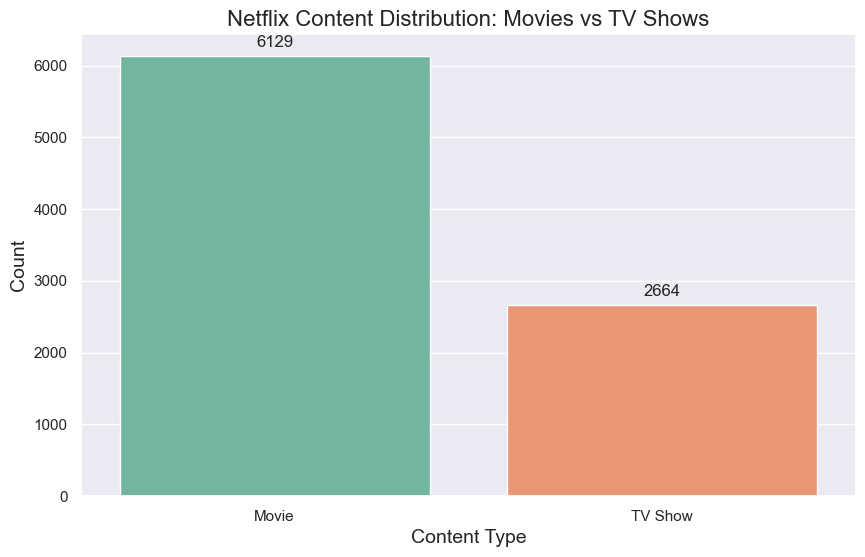

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', data=df, palette='Set2')

plt.title('Netflix Content Distribution: Movies vs TV Shows', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display counts above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Content Growth Over the Years

Netflix content has increased significantly in recent years.

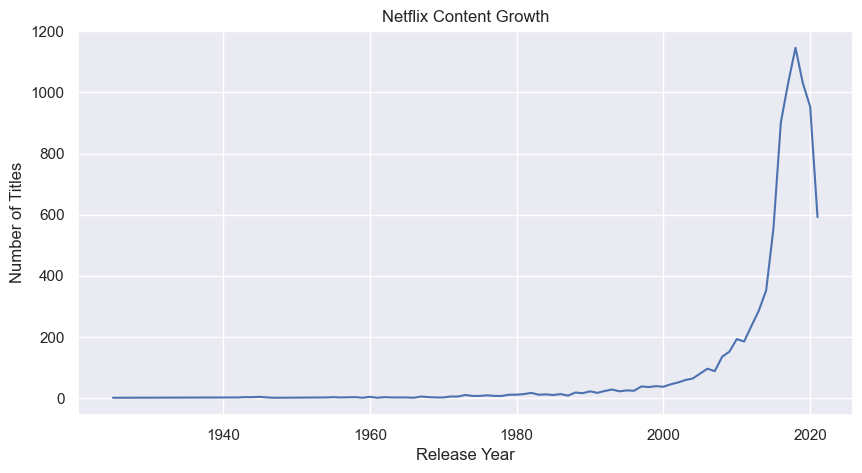

In [ ]:
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_counts.plot(kind='line')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Content Growth")
plt.show()

## Top Producing Countries

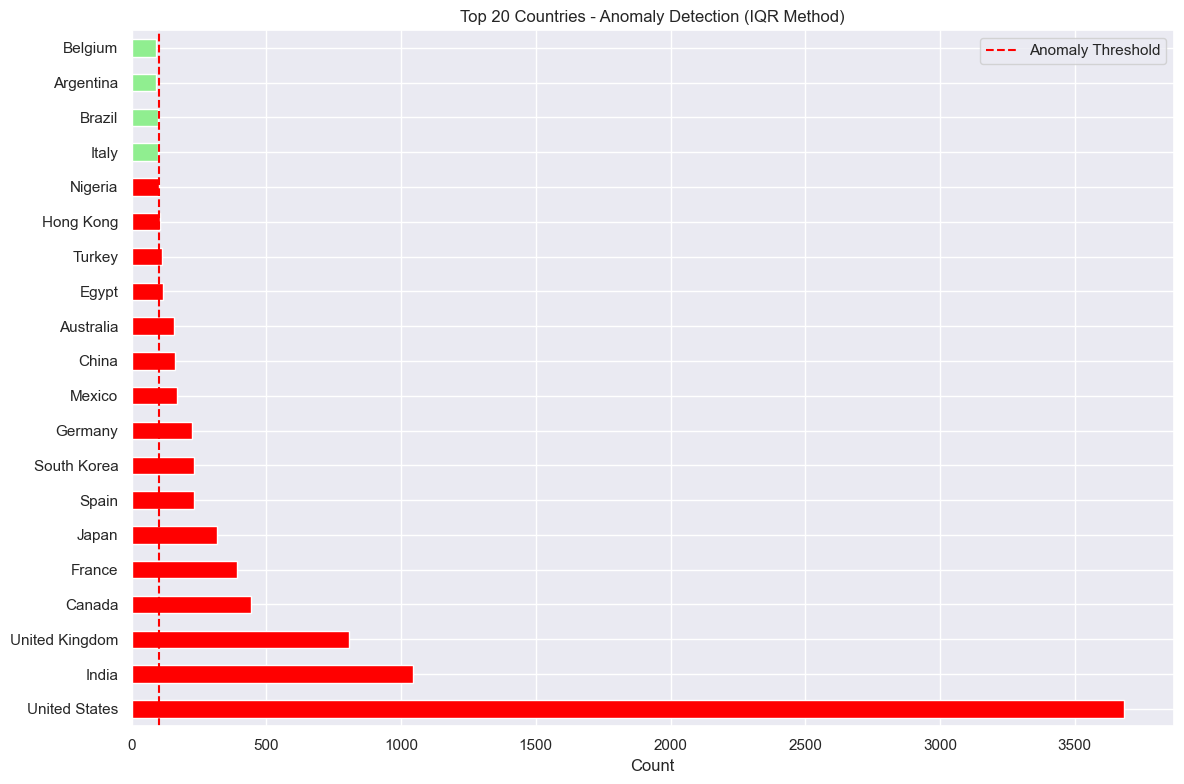

In [ ]:
from collections import Counter
all_countries = []
for countries in df['country'].dropna():
    if countries != "Unknown Country":
        all_countries.extend([c.strip() for c in countries.split(',')])

country_counts = Counter(all_countries)
country_series = pd.Series(dict(country_counts))

q1_country = country_series.quantile(0.25)
q3_country = country_series.quantile(0.75)
iqr_country = q3_country - q1_country
upper_bound_country = q3_country + 1.5 * iqr_country

plt.figure(figsize=(12, 8))
top_20_countries = country_series.nlargest(20)
colors_country = ['red' if x > upper_bound_country else 'lightgreen' 
                 for x in top_20_countries.values]
top_20_countries.plot(kind='barh', color=colors_country)
plt.title("Top 20 Countries - Anomaly Detection (IQR Method)")
plt.xlabel("Count")
plt.axvline(x=upper_bound_country, color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.tight_layout()
plt.show()

## Genre Distribution

Loading data...
Success: 'netflix_cleaned.csv' loaded.


/var/folders/m5/jgbghp1d02z3g_fj2m3dq1340000gn/T/ipykernel_93161/1186881013.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


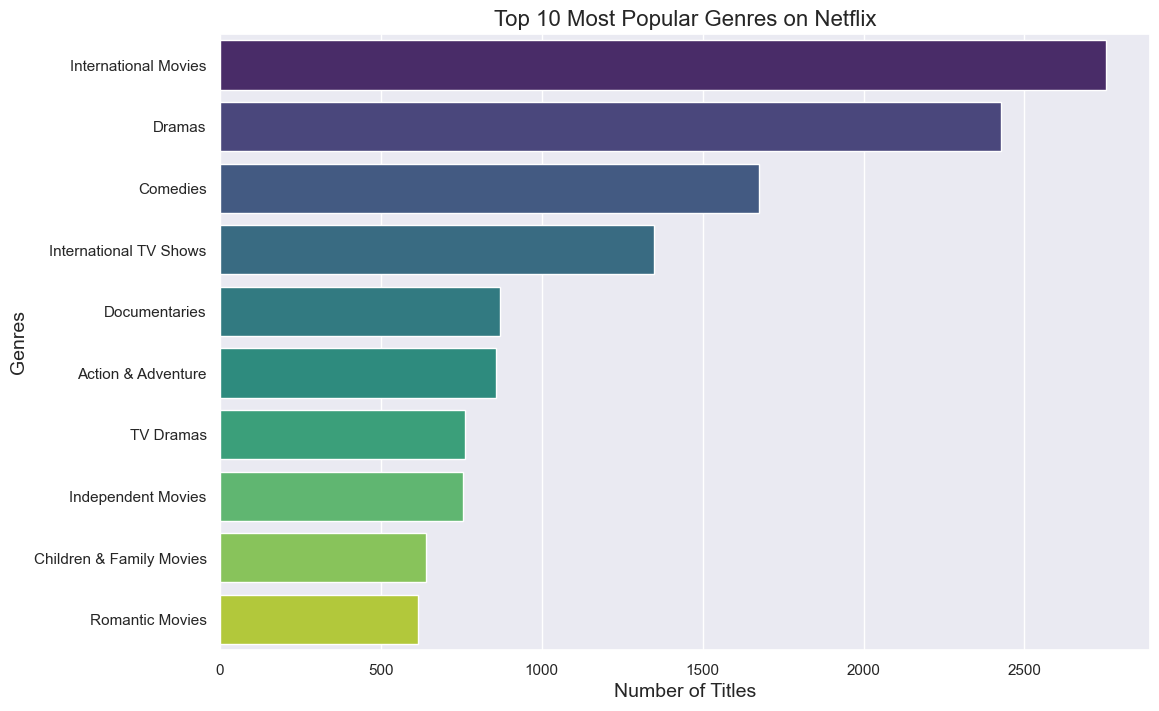

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

print("Loading data...")
try:
    df = pd.read_csv('netflix_cleaned.csv')
    print("Success: 'netflix_cleaned.csv' loaded.")
except FileNotFoundError:
    try:
    
        df = pd.read_csv('netflix_titles.csv')
        print("Info: 'netflix_cleaned.csv' not found, loaded 'netflix_titles.csv' instead.")
    except FileNotFoundError:
        print("CRITICAL ERROR: No data file found. Please ensure the CSV file is in the folder.")
        df = None

if df is not None:
    if 'listed_in' in df.columns:
        
        genres_list = df['listed_in'].str.split(', ', expand=True).stack()
        
        # Get the top 10 most frequent genres
        top_genres = genres_list.value_counts().head(10)

    
        plt.figure(figsize=(12, 8))

        sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')

        # Add English Titles and Labels
        plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16)
        plt.xlabel('Number of Titles', fontsize=14)
        plt.ylabel('Genres', fontsize=14)

        # Show the plot
        plt.show()
        
    else:
        print("Error: The column 'listed_in' was not found in the dataset.")

## Rating Distribution

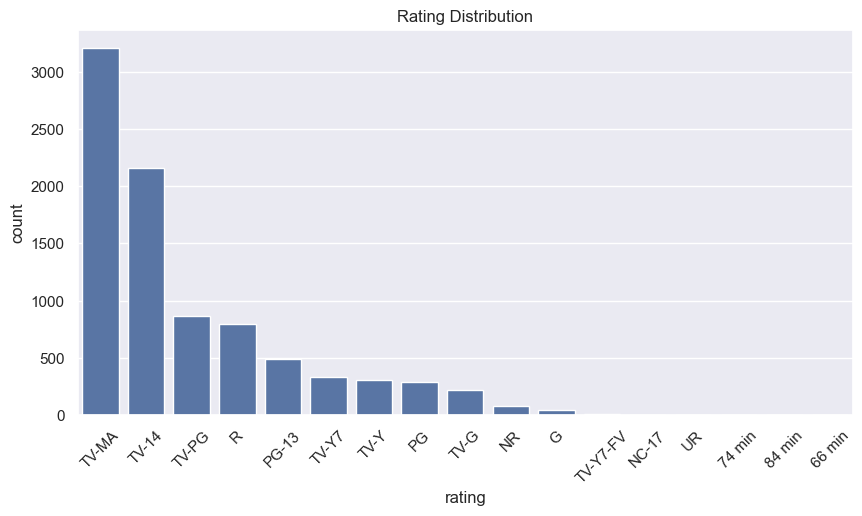

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Rating Distribution")
plt.show()

## Duration Distribution

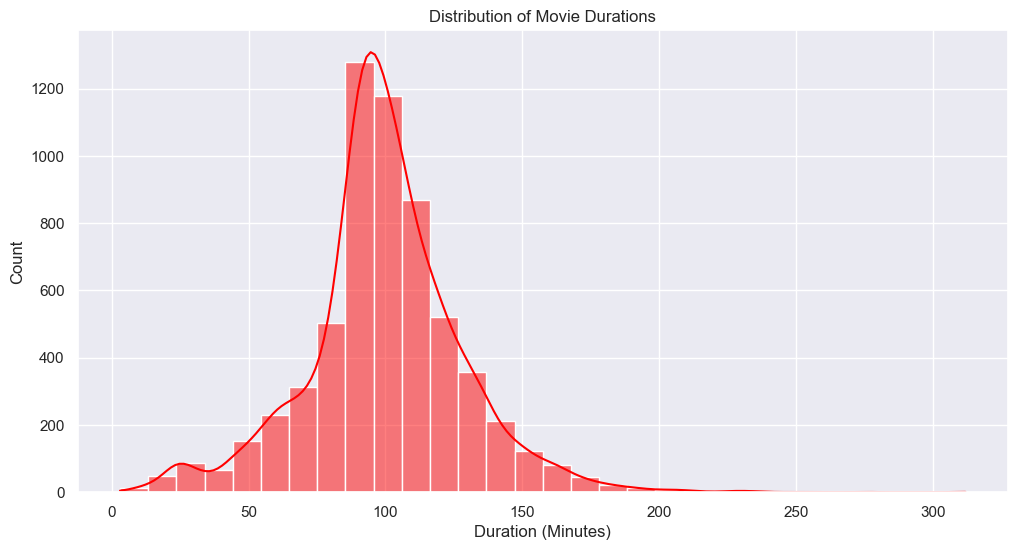

In [12]:

movies = df[df['type'] == 'Movie']

plt.figure(figsize=(12, 6))
sns.histplot(movies['duration_numeric'], bins=30, kde=True, color='red')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

## Popular Actors

/var/folders/m5/jgbghp1d02z3g_fj2m3dq1340000gn/T/ipykernel_93161/1946449666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, y="Actor", x="Title Count", palette="viridis")


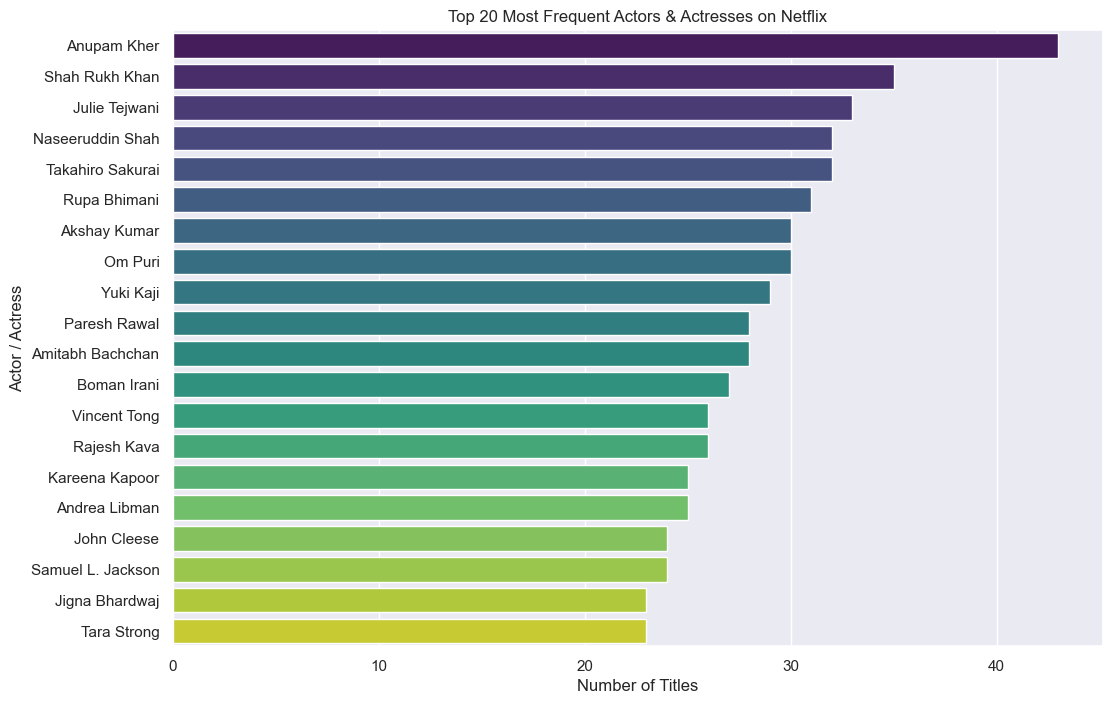

In [13]:

cs_data = df[df["cast"] != "Unknown Cast"]["cast"]
cs = cs_data.astype(str).str.split(", ").explode()
top_actors = cs.value_counts().head(20).reset_index()
top_actors.columns = ["Actor", "Title Count"]

plt.figure(figsize=(12, 8))
sns.barplot(data=top_actors, y="Actor", x="Title Count", palette="viridis")
plt.title("Top 20 Most Frequent Actors & Actresses on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor / Actress")
plt.show()

## Rating vs Type

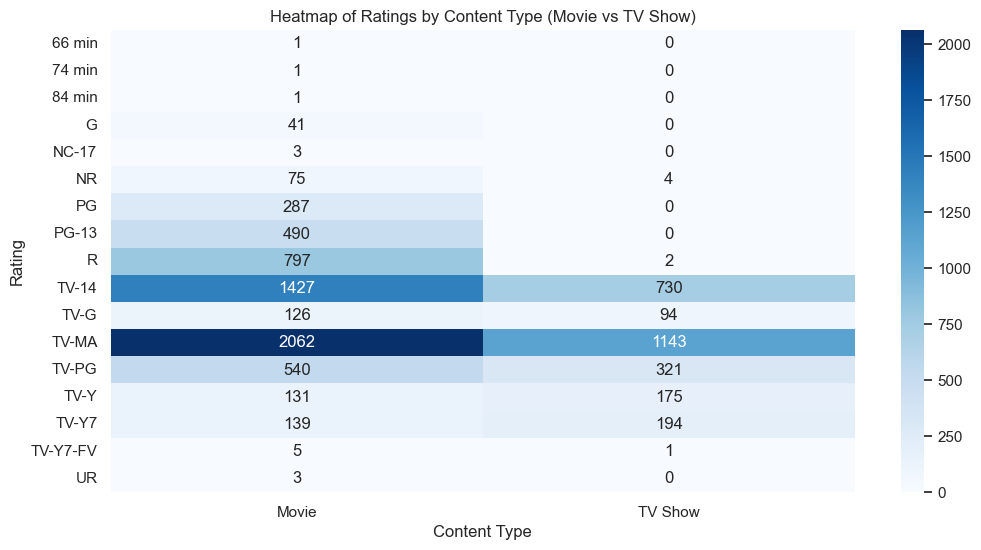

In [14]:

rating_type_tab = pd.crosstab(df["rating"], df["type"])

plt.figure(figsize=(12, 6))
sns.heatmap(rating_type_tab, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Ratings by Content Type (Movie vs TV Show)")
plt.xlabel("Content Type")
plt.ylabel("Rating")
plt.show()

## Anomaly Detection: Z-Score

Number of Anomalies Detected: 217


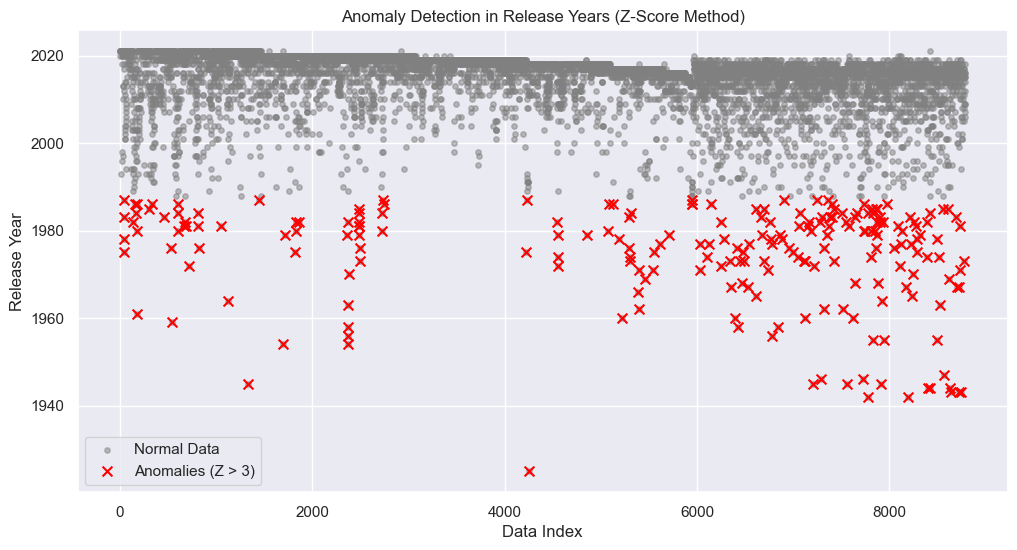

In [15]:

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['release_year'].dropna()))
anomalies = df.iloc[df['release_year'].dropna().index][z_scores > 3] # Threshold > 3

print(f"Number of Anomalies Detected: {len(anomalies)}")

plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['release_year'], alpha=0.5, label='Normal Data', s=15, color='gray')
plt.scatter(anomalies.index, anomalies['release_year'], color='red', label='Anomalies (Z > 3)', s=50, marker='x')
plt.title("Anomaly Detection in Release Years (Z-Score Method)")
plt.xlabel("Data Index")
plt.ylabel("Release Year")
plt.legend()
plt.show()

## YEAR DISTRIBUTION BY GENRE

/var/folders/m5/jgbghp1d02z3g_fj2m3dq1340000gn/T/ipykernel_93161/4189734481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_genre, x="primary_genre", y="release_year", palette="Set2")


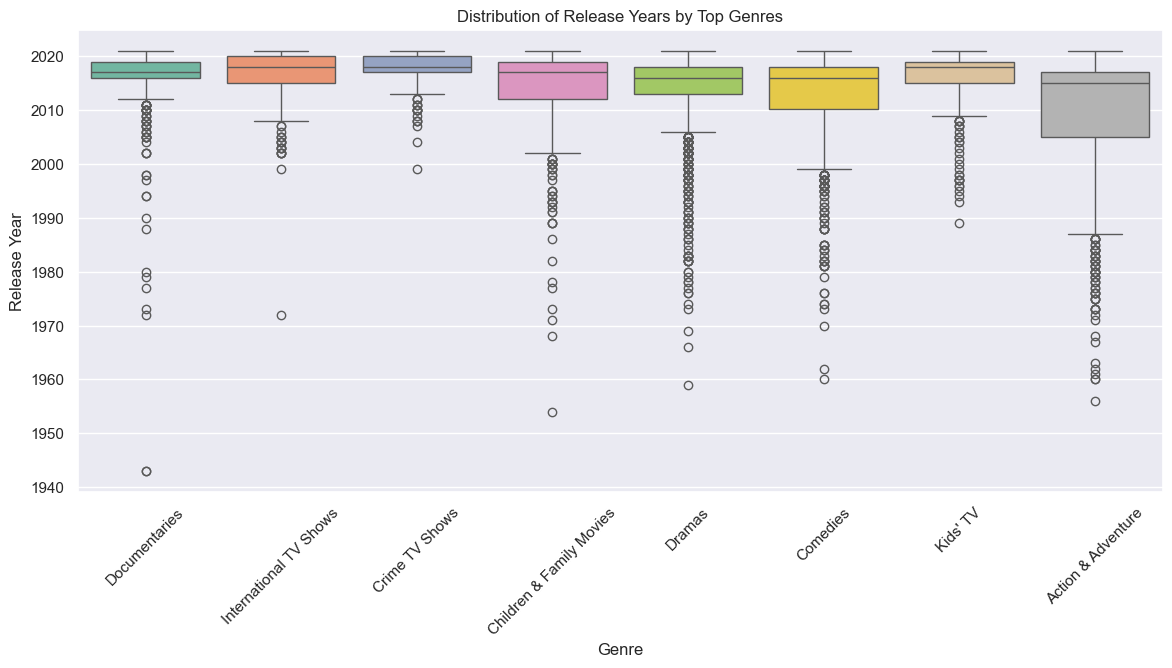

In [16]:

df_genre = df.copy()
df_genre["primary_genre"] = df_genre["listed_in"].astype(str).str.split(",").str[0]

top_genres = df_genre["primary_genre"].value_counts().head(8).index
df_genre = df_genre[df_genre["primary_genre"].isin(top_genres)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_genre, x="primary_genre", y="release_year", palette="Set2")
plt.title("Distribution of Release Years by Top Genres")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Release Year")
plt.show()

## Conclusion

Movies (69.2%) outnumber TV shows (30.8%) in Netflix’s catalog. The data show that Netflix content has increased rapidly since 2015, with Drama and Comedy genres becoming dominant. According to the country analysis, the USA is statistically overwhelmingly dominant in content production.